In [1]:
import pandas as pd

In [2]:
walmart=pd.read_csv("C:/Users/HP/TimeSeries/Walmart.csv")

In [3]:
walmart.head()

,Month,Footfalls
0,Jan-91,1709
1,Feb-91,1621
2,Mar-91,1973
3,Apr-91,1812
4,May-91,1975


In [4]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jal','Aug','Sep','Oct','Nov','Dec']

In [5]:
#in walmart data we have jan-1991 in 0 th column,we need only first three letters

In [6]:
#Example Jan from each cell

In [7]:
p=walmart['Month'][0]

In [8]:
p[0:3]

'Jan'

In [9]:
#Before we will extarct, let us create new column called months to  store months

In [10]:
walmart['months']=0

In [11]:
#You can check the dataframe with months name with all values 0
#the total records in walmart is 159

In [12]:
for i in range(159):
    p=walmart['Month'][i]
    walmart['months'][i]=p[0:3]
    #for all these variables craete dummy variable



C:\Users\HP\AppData\Local\Temp\ipykernel_20752\14348868.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  walmart['months'][i]=p[0:3]
C:\Users\HP\AppData\Local\Temp\ipykernel_20752\14348868.py:3: SettingWithCopyWarning: 
A value is trying 

In [13]:
month_dummies=pd.DataFrame(pd.get_dummies(walmart['months']))

In [14]:
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False,False,False,True,False,False
155,False,False,True,False,False,False,False,False,False,False,False,False
156,False,False,False,False,True,False,False,False,False,False,False,False
157,False,False,False,True,False,False,False,False,False,False,False,False


In [15]:
#now let us concatenate these dummy values in DataFrame


In [16]:
walmart1=pd.concat([walmart,month_dummies],axis=1)

In [17]:
walmart1

,Month,Footfalls,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-91,1709,Jan,False,False,False,False,True,False,False,False,False,False,False,False
1,Feb-91,1621,Feb,False,False,False,True,False,False,False,False,False,False,False,False
2,Mar-91,1973,Mar,False,False,False,False,False,False,False,True,False,False,False,False
3,Apr-91,1812,Apr,True,False,False,False,False,False,False,False,False,False,False,False
4,May-91,1975,May,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,Nov,False,False,False,False,False,False,False,False,False,True,False,False
155,Dec-03,2141,Dec,False,False,True,False,False,False,False,False,False,False,False,False
156,Jan-04,1832,Jan,False,False,False,False,True,False,False,False,False,False,False,False
157,Feb-04,1838,Feb,False,False,False,True,False,False,False,False,False,False,False,False


In [18]:
#you can check DataFrame walmart1

In [19]:
#similarly we need to craete column t

In [20]:
import numpy as np

In [21]:
walmart1['t']=np.arange(1,160)
walmart1['t_squared']=walmart1['t']*walmart1['t']
walmart1['log_footfalls']=np.log(walmart1['Footfalls'])

In [22]:
walmart1.columns

Index(['Month', 'Footfalls', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_footfalls'],
      dtype='object')

In [23]:
#now let us check the visuals of the footfall

<Axes: >

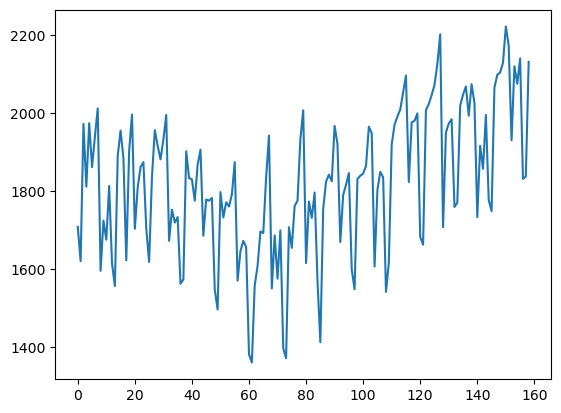

In [24]:
walmart1.Footfalls.plot()

In [25]:
#You will get exponential trend with first decreasing and then increasing 
#we have to forecast footfalls in next12 months hence the horizon =12 even 
#season=12 so validating data will be 12 and training will 159-12=147

In [27]:
Train=walmart1.head(147)

In [28]:
Train

,Month,Footfalls,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_footfalls
0,Jan-91,1709,Jan,False,False,False,False,True,False,False,False,False,False,False,False,1,1,7.443664
1,Feb-91,1621,Feb,False,False,False,True,False,False,False,False,False,False,False,False,2,4,7.390799
2,Mar-91,1973,Mar,False,False,False,False,False,False,False,True,False,False,False,False,3,9,7.587311
3,Apr-91,1812,Apr,True,False,False,False,False,False,False,False,False,False,False,False,4,16,7.502186
4,May-91,1975,May,False,False,False,False,False,False,False,False,True,False,False,False,5,25,7.588324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Nov-02,1858,Nov,False,False,False,False,False,False,False,False,False,True,False,False,143,20449,7.527256
143,Dec-02,1996,Dec,False,False,True,False,False,False,False,False,False,False,False,False,144,20736,7.598900
144,Jan-03,1778,Jan,False,False,False,False,True,False,False,False,False,False,False,False,145,21025,7.483244
145,Feb-03,1749,Feb,False,False,False,True,False,False,False,False,False,False,False,False,146,21316,7.466799


In [29]:
Test=walmart1.tail(12)

In [30]:
Test

,Month,Footfalls,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_footfalls
147,Apr-03,2099,Apr,True,False,False,False,False,False,False,False,False,False,False,False,148,21904,7.649216
148,May-03,2105,May,False,False,False,False,False,False,False,False,True,False,False,False,149,22201,7.652071
149,Jun-03,2130,Jun,False,False,False,False,False,False,True,False,False,False,False,False,150,22500,7.663877
150,Jul-03,2223,Jul,False,False,False,False,False,True,False,False,False,False,False,False,151,22801,7.706613
151,Aug-03,2174,Aug,False,True,False,False,False,False,False,False,False,False,False,False,152,23104,7.684324
152,Sep-03,1931,Sep,False,False,False,False,False,False,False,False,False,False,False,True,153,23409,7.565793
153,Oct-03,2121,Oct,False,False,False,False,False,False,False,False,False,False,True,False,154,23716,7.659643
154,Nov-03,2076,Nov,False,False,False,False,False,False,False,False,False,True,False,False,155,24025,7.638198
155,Dec-03,2141,Dec,False,False,True,False,False,False,False,False,False,False,False,False,156,24336,7.669028
156,Jan-04,1832,Jan,False,False,False,False,True,False,False,False,False,False,False,False,157,24649,7.513164


In [31]:
#Now let us apply linear regression

In [37]:
import statsmodels.formula.api as smf
import numpy as np

# Linear Model

In [38]:
linear_model=smf.ols("Footfalls~t",data=Train).fit()

In [61]:
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))

In [62]:
rmse_linear

209.92559265462546

# Exponential Model

In [63]:
Exp_model=smf.ols("log_footfalls~t",data=Train).fit()

In [64]:
pred_Exp=pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.exp(pred_Exp))**2))

In [65]:
rmse_Exp

217.05263566813173

# Quadratic Model

In [66]:
Quad=smf.ols("Footfalls~t+t_squared",data=Train).fit()

In [67]:
pred_Quad=pd.Series(Quad.predict(pd.DataFrame(Test[['t','t_squared']])))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_Quad))**2))

In [68]:
rmse_Quad

137.15462741356484

# Additive seasonality

In [69]:
add_sea=smf.ols('Footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [70]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Footfalls   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     15.70
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           2.17e-19
Time:                        15:41:04   Log-Likelihood:                -903.08
No. Observations:                 147   AIC:                             1830.
Df Residuals:                     135   BIC:                             1866.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1835.3333     33.940     54.075      0.000    1768.210    1902.457
Jan[T.True]  -231.4103     47.067     -4.917      0.000    -324.494    -138.327
Feb[T.True]  -268.9487     47.067     -5.714      0.000    -362.032    -175.865
Mar[T.True]    31.5897     47.067      0.671      0.503     -61.494     124.673
Apr[T.True]    19.9167     47.999      0.415      0.679     -75.010     114.843
May[T.True]    51.0833     47.999      1.064      0.289     -43.843     146.010
Jun[T.True]     9.7500     47.999      0.203      0.839     -85.177     104.677
Jul[T.True]   114.3333     47.999      2.382      0.019      19.407     209.260
Aug[T.True]   159.4167     47.999      3.321      0.001      64.490     254.343
Sep[T.True]  -173.6667     47.999     -3.618      0.000    -268.593     -78.740
Oct[T.True]   -34.0833     47.999     -0.710      0.479    -129.010      60.843
Nov[T.True]   -44.0833     47.999     -0.918      0.360    -139.010      50.843
==============================================================================
Omnibus:                        1.631   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.399
Skew:                          -0.078   Prob(JB):                        0.497
Kurtosis:                       2.549   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
pred_add_sea=pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea))**2))

In [72]:
rmse_add_sea

264.6643900568774

# Multiplicative Seasonality Model

In [78]:
mul_sea=smf.ols('log_footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [81]:
pred_mul_sea=pd.Series(mul_sea.predict(Test))
rmse_mul_sea=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_mul_sea)))**2))

In [82]:
rmse_mul_sea

268.197032530917

# Additive Seasonality With Quadratic Trend

In [85]:
add_sea_quad=smf.ols('Footfalls ~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [87]:
pred_add_sea_quad=pd.Series(add_sea_quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))

In [88]:
rmse_add_sea_quad

50.60724584048495

# Multiplicative seasonality Linear Model

In [89]:
mul_add_sea=smf.ols('log_footfalls ~t+ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [90]:
pred_mul_add_sea=pd.Series(mul_add_sea.predict(Test))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_mul_add_sea)))**2))

In [91]:
rmse_mul_add_sea

172.7672678466982

In [92]:
#Let us create a DataFrame and all these rmse_values

In [101]:
data={"Model":pd.Series(['rmse_linear','rmse_exp','rmse_Quad','rmse_add_sea','rmse_mul_sea','rmse_add_sea_quad','rmse_mul_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_add_sea,rmse_add_sea,rmse_mul_sea,rmse_add_sea_quad,rmse_mul_add_sea])}

In [102]:
data

{'Model': 0          rmse_linear
 1             rmse_exp
 2            rmse_Quad
 3         rmse_add_sea
 4         rmse_mul_sea
 5    rmse_add_sea_quad
 6     rmse_mul_add_sea
 dtype: object,
 'RMSE_Values': 0    209.925593
 1    217.052636
 2    264.664390
 3    264.664390
 4    268.197033
 5     50.607246
 6    172.767268
 dtype: float64}

In [103]:
#Now let us test model with full data

In [104]:
predict_data=pd.read_excel('Predict_new.xlsx')

In [105]:
predict_data.head()

,Month,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2004-04-01,160,25600,0,0,0,1,0,0,0,0,0,0,0,0
1,2004-05-01,161,25921,0,0,0,0,1,0,0,0,0,0,0,0
2,2004-06-01,162,26244,0,0,0,0,0,1,0,0,0,0,0,0
3,2004-07-01,163,26569,0,0,0,0,0,0,1,0,0,0,0,0
4,2004-08-01,164,26896,0,0,0,0,0,0,0,1,0,0,0,0


In [106]:
model_full=smf.ols('Footfalls ~t+t_squared+ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=walmart1).fit()

In [115]:
pred_new=pd.Series(model_full.predict(predict_data))

In [117]:
pred_new

0                                                             2193.807626
1                                                             2229.969736
2                                                             2200.670308
3                                                             2311.293957
4                                                             2356.071452
5                                                             2036.848947
6                                                             2187.241826
7                                                             2181.480859
8                                                             2234.104508
9                                                             1999.997498
10                                                            1972.995363
11                                                            2280.493228
forecasted_Footfalls    0     2193.807626
1     2229.969736
2     2200...
dtype: object

In [118]:
predict_data['forecasted_Footfalls']=pd.Series(pred_new)

In [119]:
predict_data['forecasted_Footfalls']

0     2193.807626
1     2229.969736
2     2200.670308
3     2311.293957
4     2356.071452
5     2036.848947
6     2187.241826
7     2181.480859
8     2234.104508
9     1999.997498
10    1972.995363
11    2280.493228
Name: forecasted_Footfalls, dtype: object